Initial shape: (8790, 10)
Initial missing values:
show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


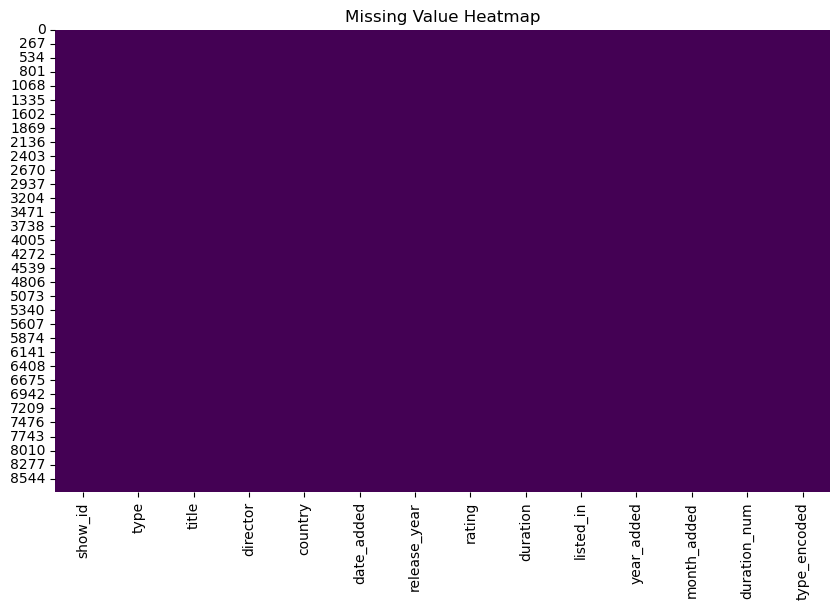

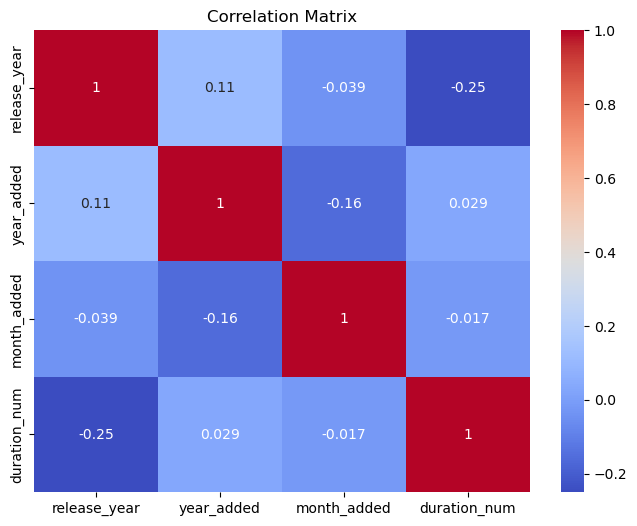


Summary Statistics:
        show_id   type  title   director        country  \
count     8790   8790   8790       8790           8790   
unique    8790      2   8787       4528             86   
top         s1  Movie  9-Feb  Not Given  United States   
freq         1   6126      2       2588           3240   
mean       NaN    NaN    NaN        NaN            NaN   
min        NaN    NaN    NaN        NaN            NaN   
25%        NaN    NaN    NaN        NaN            NaN   
50%        NaN    NaN    NaN        NaN            NaN   
75%        NaN    NaN    NaN        NaN            NaN   
max        NaN    NaN    NaN        NaN            NaN   
std        NaN    NaN    NaN        NaN            NaN   

                           date_added  release_year rating  duration  \
count                            8790   8790.000000   8790      8790   
unique                            NaN           NaN     14       220   
top                               NaN           NaN  TV-MA  1 Sea

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("netflix1.csv")

# Display initial shape and column info
print("Initial shape:", df.shape)
print("Initial missing values:\n", df.isnull().sum())

# Replace empty strings with NaN
df.replace({'country': {'': np.nan}, 'rating': {'': np.nan}, 'director': {'': np.nan}}, inplace=True)

# Fill missing values
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['rating'] = df['rating'].fillna('Not Rated')
df['director'] = df['director'].fillna('No Director')

# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year and month
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Remove duplicates
df.drop_duplicates(inplace=True)

# Extract duration numbers (in minutes or seasons)
df['duration_num'] = df['duration'].str.extract(r'(\d+)').astype(float)

# Encode 'type' as 0 (Movie) and 1 (TV Show)
df['type_encoded'] = df['type'].map({'Movie': 0, 'TV Show': 1})

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()

# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df[['release_year', 'year_added', 'month_added', 'duration_num']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Summary statistics
print("\nSummary Statistics:\n", df.describe(include='all'))

# Top countries
print("\nTop 10 Countries by Content:\n", df['country'].value_counts().head(10))

# Save cleaned dataset
df.to_csv("netflix1_cleaned.csv", index=False)
print("\n✅ Cleaned dataset saved as 'netflix1_cleaned.csv'")